<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [329]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as MAE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [224]:
#Load database
insurance_data = pd.read_csv("insurance.csv")

## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [227]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
#Check if dataset has null values in any columm
null_vals = insurance_data.isnull().sum()
print(null_vals)

#Note: no null values were found in the dataset, dataset is ready to be used for training

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [231]:
#Check data types in the dataset to verify if they need encoding or not
insurance_data.dtypes

#Sex, smoker, and region columns are objects and may need to be encoded into numerical values for the model

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [234]:
#Calculate mean, mode, and median for all numerical columns
for col in insurance_data.select_dtypes(exclude=["object"]).columns:
        mean_val = insurance_data[col].mean()
        mode_val = insurance_data[col].mode()
        median_val = insurance_data[col].median()
        min_val = insurance_data[col].min()
        max_val = insurance_data[col].max()
        std_val = insurance_data[col].std()
        variance_val = insurance_data[col].var()
        print(f"{col.title()}- Mean: {mean_val}, Mode: {mode_val}, Median: {median_val}, Minimum: {min_val}, Maximum: {max_val}, Standard deviation: {std_val}, Variance: {variance_val}\n")

Age- Mean: 39.20702541106129, Mode: 0    18
Name: age, dtype: int64, Median: 39.0, Minimum: 18, Maximum: 64, Standard deviation: 14.049960379216172, Variance: 197.40138665754424

Bmi- Mean: 30.66339686098655, Mode: 0    32.3
Name: bmi, dtype: float64, Median: 30.4, Minimum: 15.96, Maximum: 53.13, Standard deviation: 6.098186911679017, Variance: 37.187883609773266

Children- Mean: 1.0949177877429, Mode: 0    0
Name: children, dtype: int64, Median: 1.0, Minimum: 0, Maximum: 5, Standard deviation: 1.2054927397819095, Variance: 1.4532127456668944

Charges- Mean: 15799.570247204036, Mode: 0    1639.5631
Name: charges, dtype: float64, Median: 12403.585224999999, Minimum: 1121.8739, Maximum: 64571.07448, Standard deviation: 12559.98402109513, Variance: 157753198.610165



In [236]:
#Find amount of unique values for categorical values
for col in insurance_data.select_dtypes(include=["object"]).columns:
    unique_vals = insurance_data[col].unique()
    print(f"{col.title()} unique values: {unique_vals}")

#Find frequency of categorical values
for col in insurance_data.select_dtypes(include=["object"]).columns:
    frequency = insurance_data[col].value_counts()
    print(f"\n{col.title()} frequency: \n{frequency}")

Sex unique values: ['female' 'male']
Smoker unique values: ['yes' 'no']
Region unique values: ['southwest' 'southeast' 'northwest' 'northeast']

Sex frequency: 
sex
male      676
female    662
Name: count, dtype: int64

Smoker frequency: 
smoker
no     1064
yes     274
Name: count, dtype: int64

Region frequency: 
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


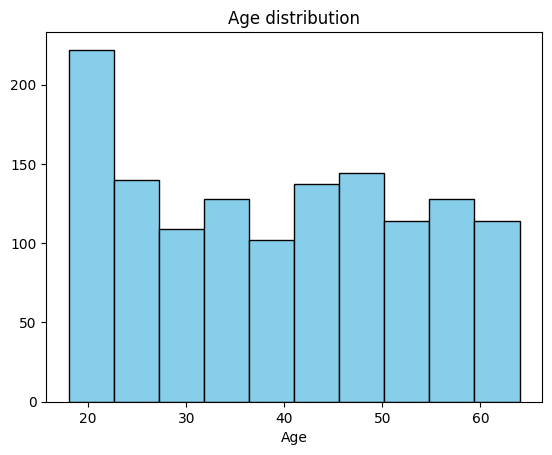

In [239]:
#Plot histogram for age
plt.hist(insurance_data['age'], color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.title("Age distribution")
plt.show()

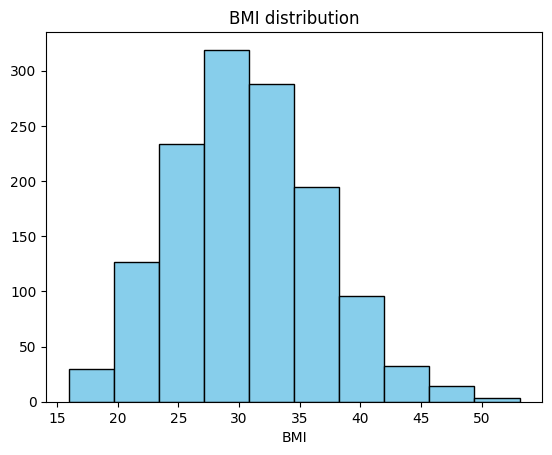

In [240]:
#Plot histogram for bmi
plt.hist(insurance_data['bmi'], color='skyblue', edgecolor='black')
plt.xlabel("BMI")
plt.title("BMI distribution")
plt.show()

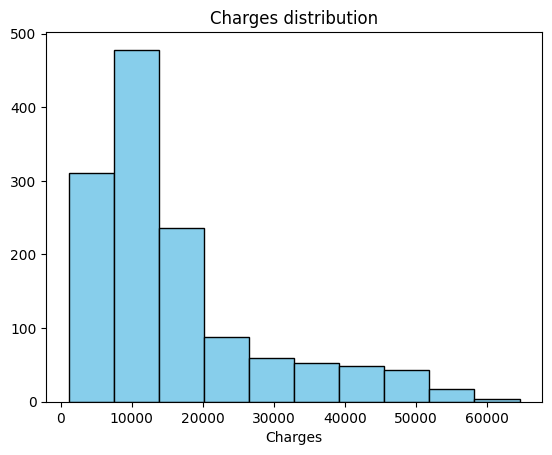

In [242]:
#Plot histogram for charges
plt.hist(insurance_data['charges'], color='skyblue', edgecolor='black')
plt.xlabel("Charges")
plt.title("Charges distribution")
plt.show()

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


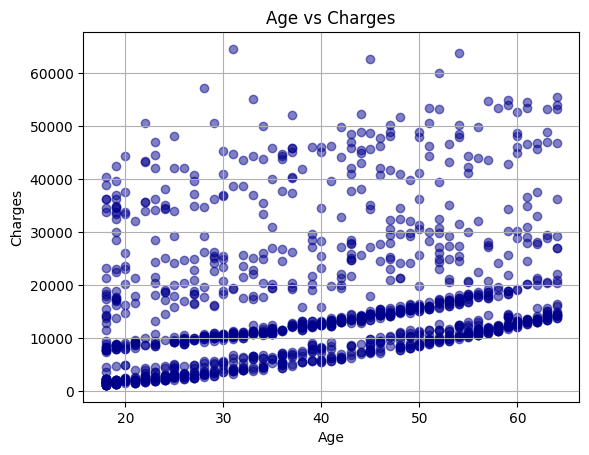

In [244]:
#Create scatter plot for age vs charges
plt.grid(True)
plt.scatter(insurance_data['age'], insurance_data['charges'], color='darkblue', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()

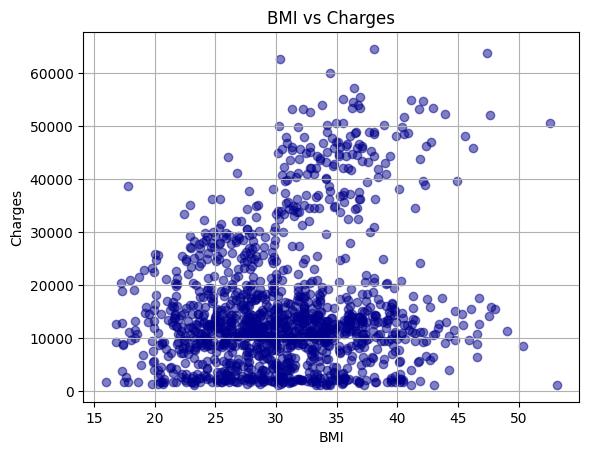

In [247]:
#Create scatter plot for bmi vs charges
plt.grid(True)
plt.scatter(insurance_data['bmi'], insurance_data['charges'], color='darkblue', alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

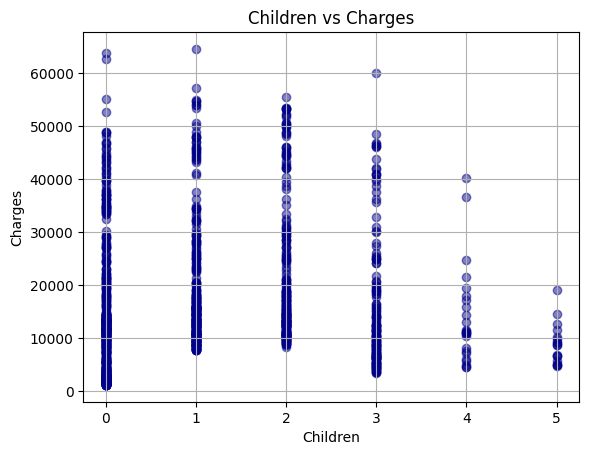

In [248]:
#Create scatter plot for children vs charges
plt.grid(True)
plt.scatter(insurance_data['children'], insurance_data['charges'], color='darkblue', alpha=0.5)
plt.xlabel("Children")
plt.ylabel("Charges")
plt.title("Children vs Charges")
plt.show()

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


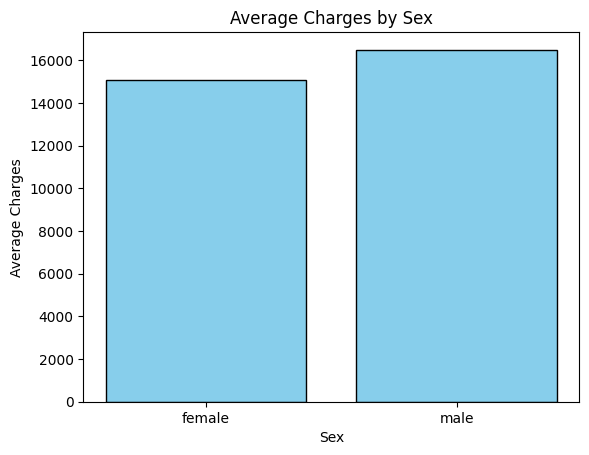

In [252]:
# Plot bar plot for chargers vs sex
mean_charges_by_sex = insurance_data.groupby('sex')['charges'].mean()


plt.bar(mean_charges_by_sex.index, mean_charges_by_sex, color='skyblue', edgecolor='black')


plt.xlabel("Sex")
plt.ylabel("Average Charges")
plt.title("Average Charges by Sex")
plt.show()

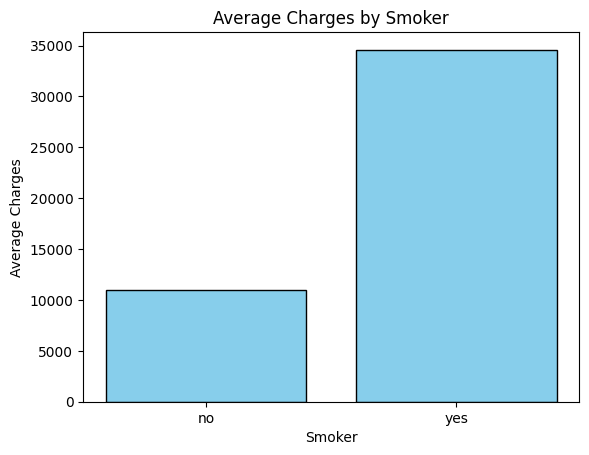

In [254]:
#Plot bar graph for charges and smoker
mean_charges_smokers = insurance_data.groupby('smoker')['charges'].mean()


plt.bar(mean_charges_smokers.index, mean_charges_smokers, color='skyblue', edgecolor='black')


plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.title("Average Charges by Smoker")
plt.show()

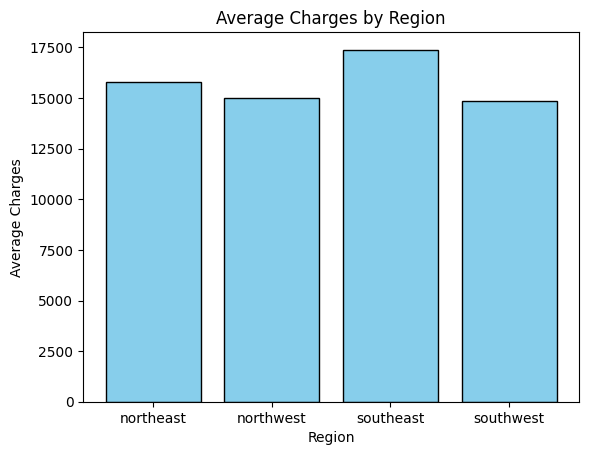

In [255]:
#Plot bar graph for charges and region
mean_charges_by_region = insurance_data.groupby('region')['charges'].mean()


plt.bar(mean_charges_by_region.index, mean_charges_by_region, color='skyblue', edgecolor='black')


plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.title("Average Charges by Region")
plt.show()

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


In [260]:
#Calculate correlation matrix
numerical_dataset = insurance_data.select_dtypes(include='number')

correlation_matrix = numerical_dataset.corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.291786
bmi       0.109272  1.000000  0.012759  0.194897
children  0.042469  0.012759  1.000000  0.120829
charges   0.291786  0.194897  0.120829  1.000000


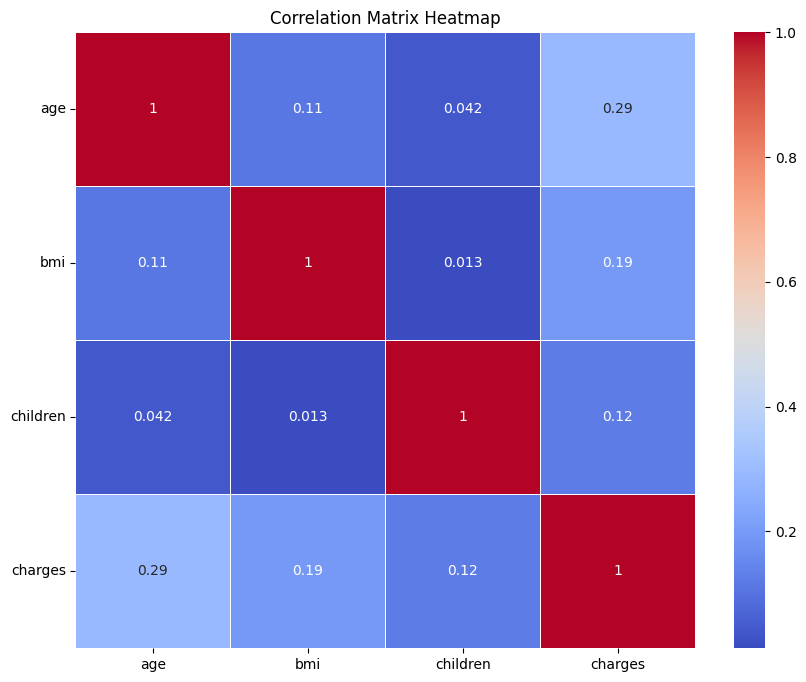

In [262]:
#Visualize correlation matrix on heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

plt.yticks(rotation=360)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [266]:
target_mean = insurance_data['charges'].mean()
print(f"The mean value of the target variable 'charges' is: {target_mean}")

#Establishing a naive baseline is important for several reasons. It helps determine whether the predictive model adds any value by comparing
#the model's performance against a point of reference, determining whether the target variable is easily predictable or if it is more complex, helps identify overfitting, 
#and helps in deciding whether a more complex model is needed depending on how far or close it is to the naive baseline

The mean value of the target variable 'charges' is: 15799.570247204036


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [315]:
#Encode categorical values using One Hot Encoder- Sex, Smoker, Region
categorical_values = insurance_data.select_dtypes(include='object').columns

encoder = OneHotEncoder(sparse_output=False)

encoded_categoricals = encoder.fit_transform(insurance_data[categorical_values])
encoded_categoricals_df = pd.DataFrame(encoded_categoricals, columns=encoder.get_feature_names_out(categorical_values))

insurance_data_encoded = insurance_data.drop(categorical_values, axis=1)
insurance_data_encoded = pd.concat([insurance_data_encoded, encoded_categoricals_df], axis=1)

insurance_data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,7725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [323]:
X = insurance_data_encoded.drop('charges', axis=1)
y = insurance_data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [325]:
insurance_model = LinearRegression()

In [327]:
insurance_model.fit(X_train, y_train)

LinearRegression()

In [347]:
insurance_pred = insurance_model.predict(X_test)

In [357]:
#Calculate R2 score 
insurance_r2 = r2_score(y_test, insurance_pred)
print(f"R-square score: {insurance_r2}")

#Calculate adjusted R2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - insurance_r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared score: {adjusted_r2}")

#Calculate MAE score
insurance_MAE = MAE(y_test, insurance_pred)
print(f"Mean absolute error score: {insurance_MAE}")

R-square score: 0.7263438163107674
Adjusted R-squared score: 0.7186253085656864
Mean absolute error score: 4996.26472669154


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



1. BMI and smoker interaction
   Reason: Smoking and high BMI are both health risk factors that could lead to higher charges. Combining these into a single feature might capture a      compounded effect
   
2. Age groups
   Reason: Categorizing age can help the model identify trends better than treating age as continuous, especially if the effects vary at different         stages of life. For example, charges might rise significantly for individuals over 50 due to increased medical needs.
   
3. Age and children interaction
   Reason: A positive correlation suggests that age and children might jointly impact charges (e.g., older parents might have higher costs due to          combined family health needs

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [367]:
#BMI and smoker interaction
insurance_data_encoded['bmi_smoker_interaction'] = insurance_data_encoded['bmi'] * insurance_data_encoded['smoker_yes']

#Age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
insurance_data_encoded['age_group'] = pd.cut(insurance_data_encoded['age'], bins=bins, labels=labels)

encoded_age_group = encoder.fit_transform(insurance_data_encoded[['age_group']])

encoded_age_group_df = pd.DataFrame(
    encoded_age_group, 
    columns=encoder.get_feature_names_out(['age_group'])
)

insurance_data_encoded = pd.concat([insurance_data_encoded, encoded_age_group_df], axis=1)

insurance_data_encoded.drop('age_group', axis=1, inplace=True)

#Age and children interaction
insurance_data_encoded['age_children_interaction'] = insurance_data_encoded['age'] * insurance_data['children']

In [369]:
X = insurance_data_encoded.drop('charges', axis=1)  # Drop the target variable
y = insurance_data_encoded['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [371]:
# Initialize the model
insurance_model_2 = LinearRegression()

In [373]:
insurance_model_2.fit(X_train, y_train)

LinearRegression()

In [375]:
insurance_model_2_pred = insurance_model_2.predict(X_test)

In [382]:
#Calculate R-squared
insurance_model2_r2 = r2_score(y_test, insurance_model_2_pred)
print(f"R-square score for model #2 with new features: {insurance_model2_r2}")
      
#Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_model2 = 1 - ((1 - insurance_model2_r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-square score for model #2 with new features: {adjusted_r2_model2}")

#Calculate MAE
mae_model2 = MAE(y_test, insurance_model_2_pred)
print(f"Mean absolute error score for model #2 with new features: {mae_model2}")

R-square score for model #2 with new features: 0.8115566938519614
Adjusted R-square score for model #2 with new features: 0.8021838592529752
Mean absolute error score for model #2 with new features: 3941.145743342152


Adding the new features certianly improved the model to explain the variance in the model about 81% according to its R2 score, or 80% according to its adjusted R2 score. This is because the new features addded allows the model to capture more nuanced relationships between the data. 

## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [385]:
#Import libraries for pipeline here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [387]:
X = insurance_data_encoded.drop('charges', axis=1)  # Features
y = insurance_data_encoded['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [389]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [397]:
param_grid = {
    'regressor__fit_intercept': [True, False],  # Hyperparameters for LinearRegression
    'regressor__n_jobs': [None, -1],  # Parallelism options
    'scaler': [StandardScaler(), None]  # Optional: use or skip scaling
}

In [399]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__n_jobs': [None, -1],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

In [401]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
grid_search_pred = best_model.predict(X_test)

# Evaluate the model performance
grid_r2 = r2_score(y_test, grid_search_pred)
grid_mae = MAE(y_test, grid_search_pred)

print(f"Best model parameters: {grid_search.best_params_}")
print(f"R-squared score: {grid_r2}")
print(f"Mean Absolute Error: {grid_mae}")

Best model parameters: {'regressor__fit_intercept': True, 'regressor__n_jobs': None, 'scaler': StandardScaler()}
R-squared score: 0.8097851534024213
Mean Absolute Error: 3970.0091488709886


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [ ]:
#Import necessary library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', GradientBoostingRegressor())  # Gradient Boosting Regressor
])

In [ ]:
param_grid_gb = {
    'regressor__n_estimators': [50, 100, 150],  # Number of boosting stages to run
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Learning rate for updates
    'regressor__max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'regressor__min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node
}

In [ ]:
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
grid_search_gb.fit(X_train, y_train)

In [ ]:
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

In [426]:
gb_pred = best_model_gb.predict(X_test)
r2_score_gb = best_model_gb.score(X_test, y_test)
mae_gb = MAE(y_test, gb_pred) 

print(f"Best model parameters: {best_params_gb}")
print(f"R-squared score for Gradient Boosting: {r2_score_gb}")
print(f"Mean Absolute Error for Gradient Boosting: {mae_gb}")

Best model parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
R-squared score for Gradient Boosting: 0.8793051327219129
Mean Absolute Error for Gradient Boosting: 2490.928859777442


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [428]:
from sklearn.ensemble import RandomForestRegressor

In [430]:
models = {
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor()
}

In [432]:
param_grids = {
    'LinearRegression': {
        'regressor__fit_intercept': [True, False],
        'regressor__n_jobs': [None, -1]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__min_samples_split': [2, 5]
    },
    'RandomForest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__n_jobs': [None, -1]
    }
}

In [434]:
scaler = StandardScaler()
pipelines = {
    'LinearRegression': Pipeline([
        ('scaler', scaler),
        ('regressor', models['LinearRegression'])
    ]),
    'GradientBoosting': Pipeline([
        ('scaler', scaler),
        ('regressor', models['GradientBoosting'])
    ]),
    'RandomForest': Pipeline([
        ('scaler', scaler),
        ('regressor', models['RandomForest'])
    ])
}

In [436]:
best_models = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    # Print results for each model
    print(f"Best model for {model_name}: {grid_search.best_params_}")
    print(f"R-squared score for {model_name}: {grid_search.best_score_}")
    print(f"Best model mean absolute error: {-grid_search.best_score_}\n")

# Optionally: Compare the best models' performance on test data
for model_name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test R-squared score for {model_name}: {test_score}")

Best model for LinearRegression: {'regressor__fit_intercept': True, 'regressor__n_jobs': None}
R-squared score for LinearRegression: -4201.674286946429
Best model mean absolute error: 4201.674286946429

Best model for GradientBoosting: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
R-squared score for GradientBoosting: -2711.269996141212
Best model mean absolute error: 2711.269996141212

Best model for RandomForest: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100, 'regressor__n_jobs': None}
R-squared score for RandomForest: -2996.361965094189
Best model mean absolute error: 2996.361965094189

Test R-squared score for LinearRegression: 0.8097851534024213
Test R-squared score for GradientBoosting: 0.8795522148719355
Test R-squared score for RandomForest: 0.8581943502538731


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [446]:
import numpy as np

final_model_pred = grid_search_gb.predict(X_test)

print("Name: Jarian Del Valle")
print("Model Type: Gradient Boosting Regressor")

#Calculate RMSE
rmse = np.sqrt(MAE(y_test, final_model_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

#Calculate Underestimation Error
underestimation_error = np.sum(y_test[y_test > final_model_pred] - final_model_pred[y_test > final_model_pred])
print(f"Underestimation Error: {underestimation_error}")

#Calculate Overestimation Error
overestimation_error = np.sum(final_model_pred[y_test < final_model_pred] - y_test[y_test < final_model_pred])
print(f"Overestimation Error: {overestimation_error}")

#Calculate Total Potential Cost or Loss
total_potential_loss = underestimation_error + overestimation_error
print(f"Total Potential Cost or Loss: {total_potential_loss}")

Name: Jarian Del Valle
Model Type: Gradient Boosting Regressor
Root Mean Squared Error (RMSE): 49.90920616256526
Underestimation Error: 441472.6000752854
Overestimation Error: 559880.8015552463
Total Potential Cost or Loss: 1001353.4016305318


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
